<a href="https://colab.research.google.com/github/tanmaykay/Stock-market-Project-Testing-/blob/main/Stock_Market_Prediction_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...
3007,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.048599,29619100
3008,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.687866,58569400
3009,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.034058,25699800
3010,2023-12-19,138.000000,138.770004,137.449997,138.100006,137.943039,20661000


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

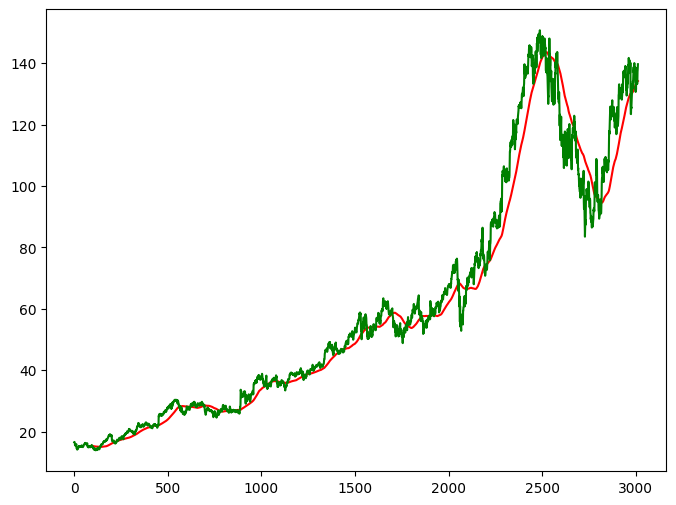

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
ma_200_days = data.Close.rolling(200).mean()

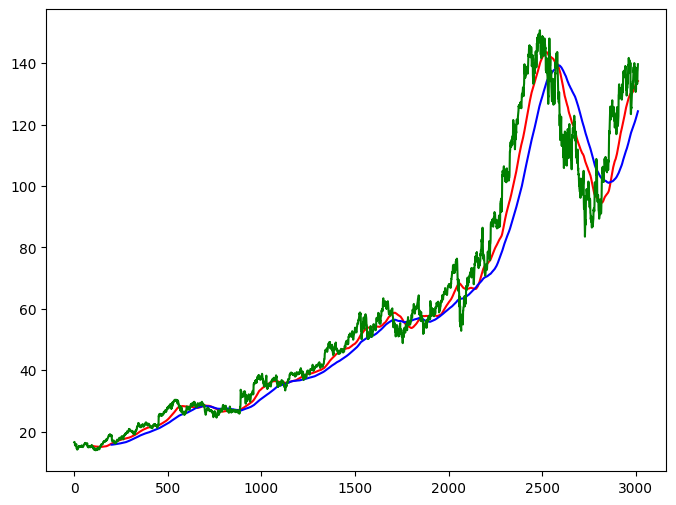

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [ ]:
data_train.shape[0]

2409

In [ ]:
data_test.shape[0]

603

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 [==============================] - 37s 398ms/step - loss: 0.0166
Epoch 2/50
73/73 [==============================] - 21s 278ms/step - loss: 0.0036
Epoch 3/50
73/73 [==============================] - 19s 263ms/step - loss: 0.0032
Epoch 4/50
73/73 [==============================] - 22s 304ms/step - loss: 0.0028
Epoch 5/50
73/73 [==============================] - 19s 261ms/step - loss: 0.0028
Epoch 6/50
73/73 [==============================] - 21s 290ms/step - loss: 0.0028
Epoch 7/50
73/73 [==============================] - 19s 267ms/step - loss: 0.0027
Epoch 8/50
73/73 [==============================] - 21s 289ms/step - loss: 0.0021
Epoch 9/50
73/73 [==============================] - 19s 264ms/step - loss: 0.0021
Epoch 10/50
73/73 [==============================] - 21s 289ms/step - loss: 0.0019
Epoch 11/50
73/73 [==============================] - 19s 263ms/step - loss: 0.0019
Epoch 12/50
73/73 [==============================] - 21s 283ms/step - loss: 0.0018
Epoch 13/50
7

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test_scale  =  scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
y_predict = model.predict(x)

19/19 [==============================] - 3s 92ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_predict*scale

In [ ]:
y = y*scale

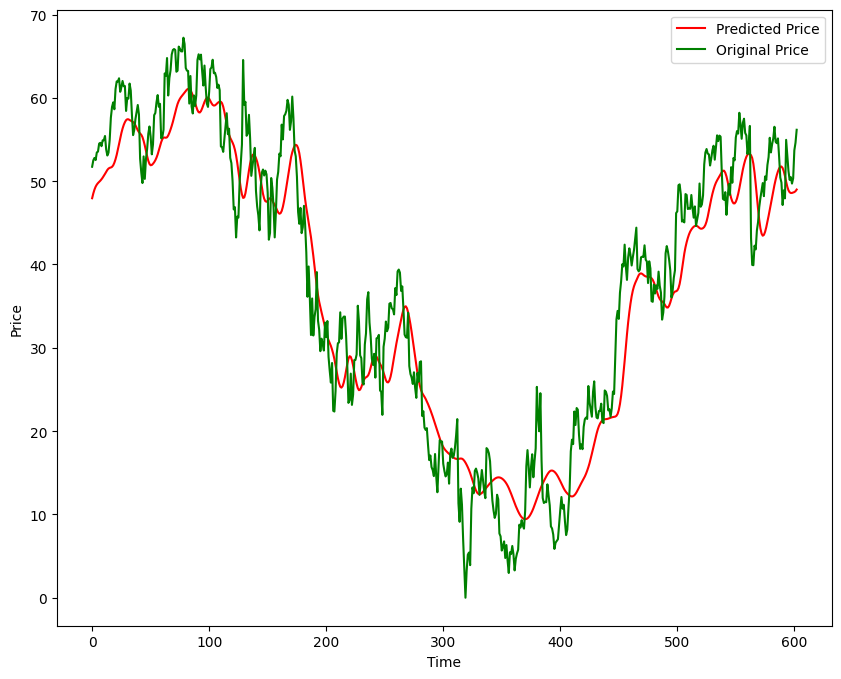

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()